<a href="https://colab.research.google.com/github/d33pd/d33pd/blob/main/M%26E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_excel('/content/drive/MyDrive/M&E data.xlsx')
fd = pd.read_excel('/content/M&E data.xlsx')

print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 28 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   District Name                                                      155 non-null    object 
 1   School Name                                                        155 non-null    object 
 2   Total Number of Students Registered                                155 non-null    int64  
 3   Numbers of active students (per month) M1                          155 non-null    int64  
 4   Numbers of active students (per month) M2                          155 non-null    int64  
 5   Numbers of active students (per month) M3                          155 non-null    int64  
 6   Numbers of active students (per month) M4                          155 non-null    int64  
 7   Numbers of active students

Programme Reach Summary Statistics:
count    155.000000
mean     152.148387
std       69.410953
min        0.000000
25%      113.000000
50%      146.000000
75%      179.000000
max      501.000000
Name: Total Number of Students Registered, dtype: float64


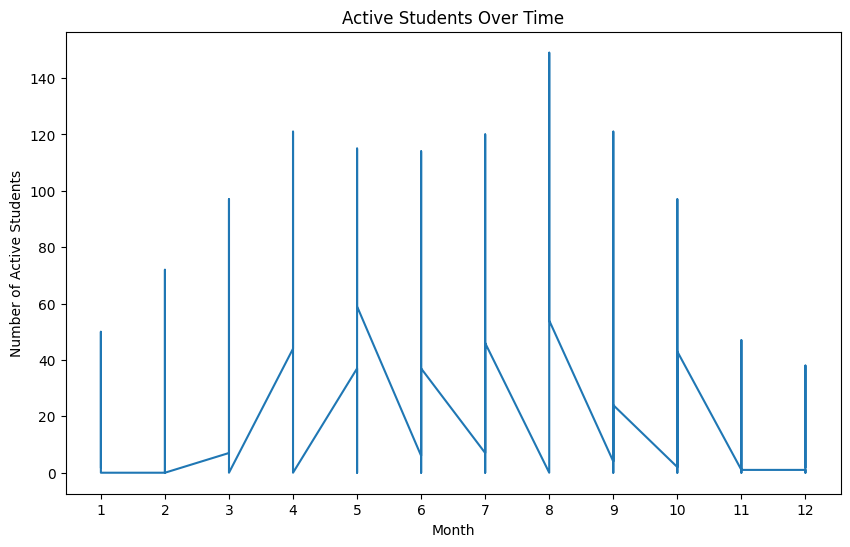

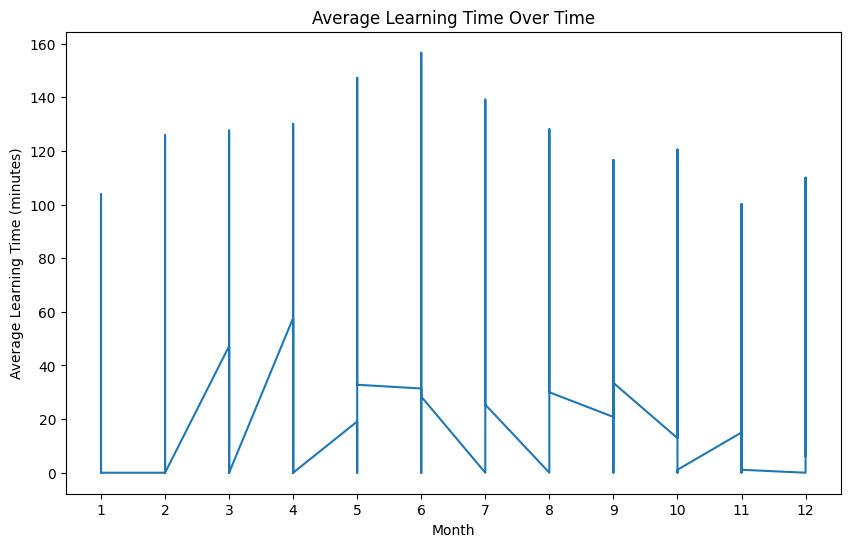

In [3]:
print("Programme Reach Summary Statistics:")
print(df['Total Number of Students Registered'].describe())

active_students_cols = [col for col in df.columns if 'Numbers of active students' in col]
df_active_students = pd.melt(df, id_vars=['District Name', 'School Name', 'Total Number of Students Registered'],
                            var_name='month', value_name='active_students', value_vars=active_students_cols)

df_active_students['month'] = df_active_students['month'].str.extract('M(\d+)', expand=False)

avg_learning_time_cols = [col for col in df.columns if 'Average learning time' in col]
df_avg_learning_time = pd.melt(df, id_vars=['District Name', 'School Name', 'Total Number of Students Registered'],
                              var_name='month', value_name='avg_learning_time', value_vars=avg_learning_time_cols)

df_avg_learning_time['month'] = df_avg_learning_time['month'].str.extract('M(\d+)', expand=False)

plt.figure(figsize=(10, 6))
plt.plot(df_active_students['month'], df_active_students['active_students'])
plt.xlabel('Month')
plt.ylabel('Number of Active Students')
plt.title('Active Students Over Time')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_avg_learning_time['month'], df_avg_learning_time['avg_learning_time'])
plt.xlabel('Month')
plt.ylabel('Average Learning Time (minutes)')
plt.title('Average Learning Time Over Time')
plt.show()

In [4]:
df_avg_learning_time

,District Name,School Name,Total Number of Students Registered,month,avg_learning_time
0,District 1,ZPP 1,133,1,0.0
1,District 1,ZPP 2,135,1,3.0
2,District 1,ZPP 3,69,1,0.0
3,District 1,ZPP 4,106,1,4.0
4,District 1,ZPP 5,102,1,0.0
...,...,...,...,...,...
1855,District 15,ZPP 151,206,12,0.0
1856,District 15,ZPP 152,95,12,2.5
1857,District 15,ZPP 153,152,12,10.1
1858,District 15,ZPP 154,56,12,0.9


In [5]:
df_active_students

,District Name,School Name,Total Number of Students Registered,month,active_students
0,District 1,ZPP 1,133,1,2
1,District 1,ZPP 2,135,1,5
2,District 1,ZPP 3,69,1,0
3,District 1,ZPP 4,106,1,5
4,District 1,ZPP 5,102,1,1
...,...,...,...,...,...
1855,District 15,ZPP 151,206,12,0
1856,District 15,ZPP 152,95,12,37
1857,District 15,ZPP 153,152,12,21
1858,District 15,ZPP 154,56,12,4


               Schools  Students
District Name                   
District 1           7       908
District 10          7       672
District 11         10      1613
District 12          6       865
District 13         12      1599
District 14         13      1590
District 15         13      2041
District 2           9      1258
District 3           8       951
District 4          12      1737
District 5           6       755
District 6          18      3637
District 7           8      1326
District 8          17      3219
District 9           9      1412


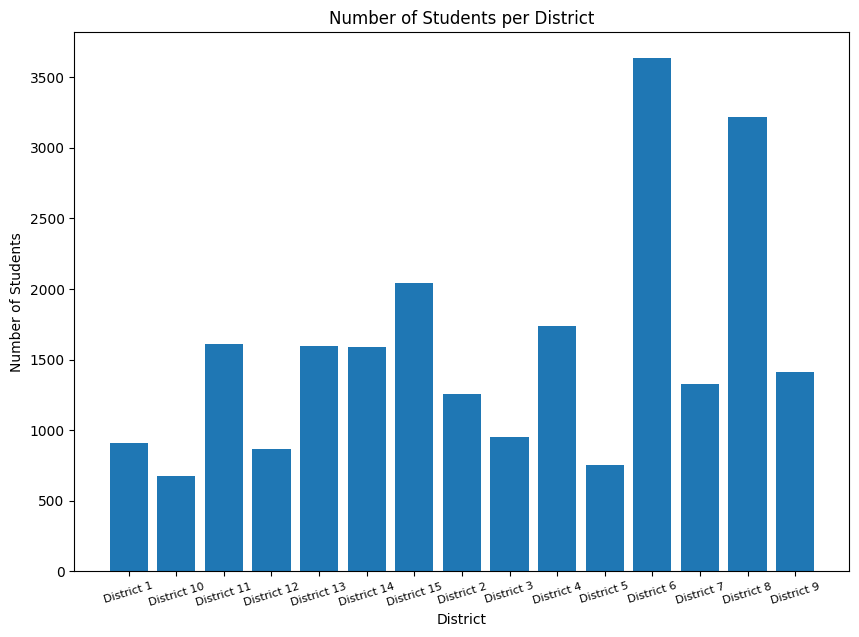

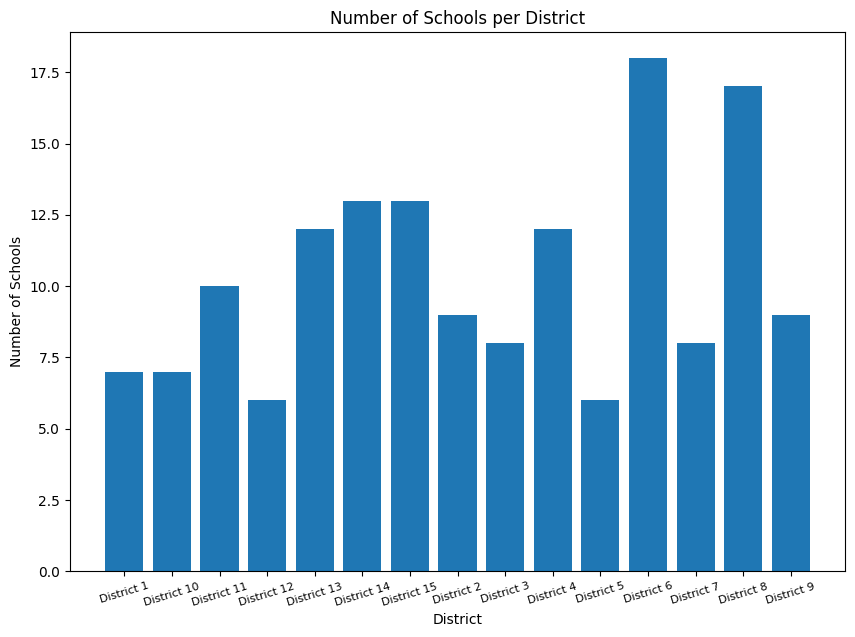

In [6]:
schools_per_district = df.groupby('District Name')['School Name'].nunique()

students_per_district = df.groupby('District Name')['Total Number of Students Registered'].sum()

district_summary = pd.DataFrame({'Schools': schools_per_district, 'Students': students_per_district})

print(district_summary)

plt.figure(figsize=(10, 7))
plt.bar(district_summary.index, district_summary['Students'])
plt.xlabel('District')
plt.ylabel('Number of Students')
plt.title('Number of Students per District')
plt.xticks(rotation=17, fontsize = 8)
plt.show()

plt.figure(figsize=(10, 7))
plt.bar(district_summary.index,district_summary['Schools'])
plt.xlabel('District')
plt.ylabel('Number of Schools')
plt.title('Number of Schools per District')
plt.xticks(rotation=17, fontsize = 8)
plt.show()

In [7]:
print("Programme Reach Summary Statistics:")
print(df['Total Number of Students Registered'].describe())

print("Top 5 Districts with Highest Programme Reach:")
print(df.groupby('District Name')['Total Number of Students Registered'].sum().sort_values(ascending=False).head(5))

print("Bottom 5 Districts with Lowest Programme Reach:")
print(df.groupby('District Name')['Total Number of Students Registered'].sum().sort_values(ascending=True).head(5))

print("Top 5 Schools with Highest Programme Reach:")
print(df.groupby('School Name')['Total Number of Students Registered'].sum().sort_values(ascending=False).head(5))

print("Bottom 5 Schools with Lowest Programme Reach:")
print(df.groupby('School Name')['Total Number of Students Registered'].sum().sort_values(ascending=True).head(5))

print("Top 5 Districts with Highest Average Learning Time:")
print(df_avg_learning_time.groupby('District Name')['avg_learning_time'].mean().sort_values(ascending=False).head(5))

print("Bottom 5 Districts with Lowest Average Learning Time:")
print(df_avg_learning_time.groupby('District Name')['avg_learning_time'].mean().sort_values(ascending=True).head(5))

print("Top 5 Schools with Highest Average Learning Time:")
print(df_avg_learning_time.groupby('School Name')['avg_learning_time'].mean().sort_values(ascending=False).head(5))

print("Bottom 5 Schools with Lowest Average Learning Time:")
print(df_avg_learning_time.groupby('School Name')['avg_learning_time'].mean().sort_values(ascending=True).head(5))



Programme Reach Summary Statistics:
count    155.000000
mean     152.148387
std       69.410953
min        0.000000
25%      113.000000
50%      146.000000
75%      179.000000
max      501.000000
Name: Total Number of Students Registered, dtype: float64
Top 5 Districts with Highest Programme Reach:
District Name
District 6     3637
District 8     3219
District 15    2041
District 4     1737
District 11    1613
Name: Total Number of Students Registered, dtype: int64
Bottom 5 Districts with Lowest Programme Reach:
District Name
District 10    672
District 5     755
District 12    865
District 1     908
District 3     951
Name: Total Number of Students Registered, dtype: int64
Top 5 Schools with Highest Programme Reach:
School Name
ZPP 53    501
ZPP 81    426
ZPP 46    391
ZPP 51    332
ZPP 78    315
Name: Total Number of Students Registered, dtype: int64
Bottom 5 Schools with Lowest Programme Reach:
School Name
ZPP 88      0
ZPP 100    33
ZPP 119    37
ZPP 57     39
ZPP 99     40
Name: T

In [8]:

def dist(school_name):
  for index, row in df.iterrows():
    if row['School Name'] == school_name:
      return row['District Name']
  return None


In [9]:
dist('ZPP 78')

'District 8'

In [ ]:
dist('ZPP 51')

'District 6'

In [ ]:
dist('ZPP 46')

'District 6'

In [ ]:
dist('ZPP 81')

'District 8'

In [ ]:
dist('ZPP 53')

'District 6'

In [ ]:
dist('ZPP 27')

'District 4'

In [ ]:
dist('ZPP 88')

'District 9'

In [ ]:
dist('ZPP 90')

'District 9'

In [ ]:
dist('ZPP 97')

'District 10'

In [ ]:
dist('ZPP 107')

'District 11'

In [ ]:
dist('ZPP 76')

'District 8'

In [ ]:
dist('ZPP 71')

'District 8'

In [ ]:
dist('ZPP 42')

'District 5'

In [ ]:
dist('ZPP 125')

'District 13'

In [ ]:
dist('ZPP 45')

'District 6'

In [ ]:
dist('ZPP 90')

'District 9'

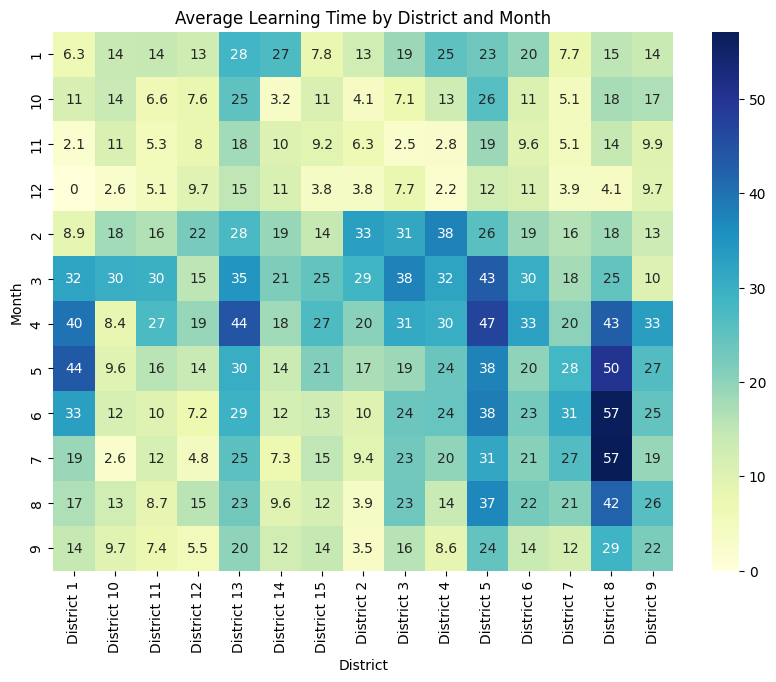

In [10]:
df_heatmap = df_avg_learning_time.pivot_table(values='avg_learning_time', index='month', columns='District Name')

plt.figure(figsize=(10, 7))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu')
plt.xlabel('District')
plt.ylabel('Month')
plt.title('Average Learning Time by District and Month')
plt.show()


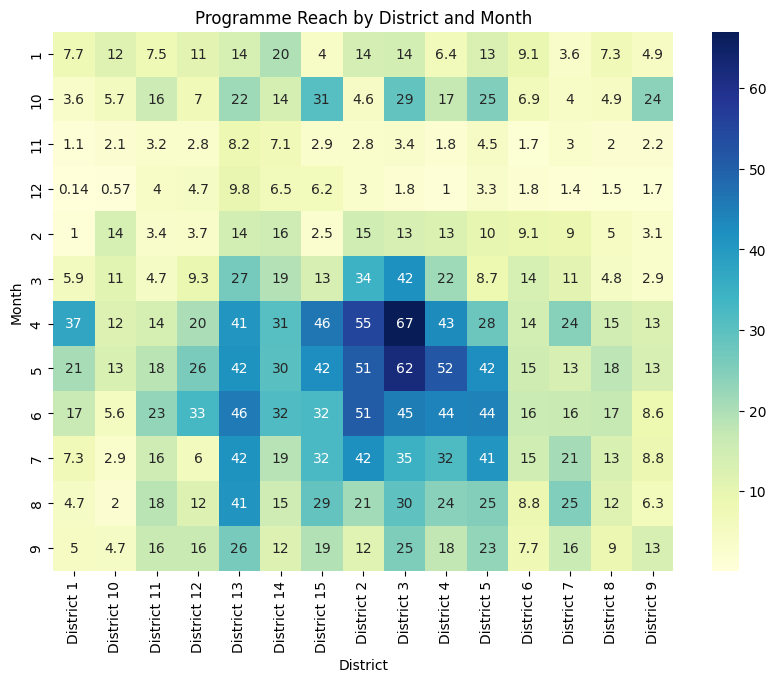

In [11]:
df_heatmap = df_active_students.pivot_table(values='active_students', index='month', columns='District Name')

plt.figure(figsize=(10, 7))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu')
plt.xlabel('District')
plt.ylabel('Month')
plt.title('Programme Reach by District and Month')
plt.show()


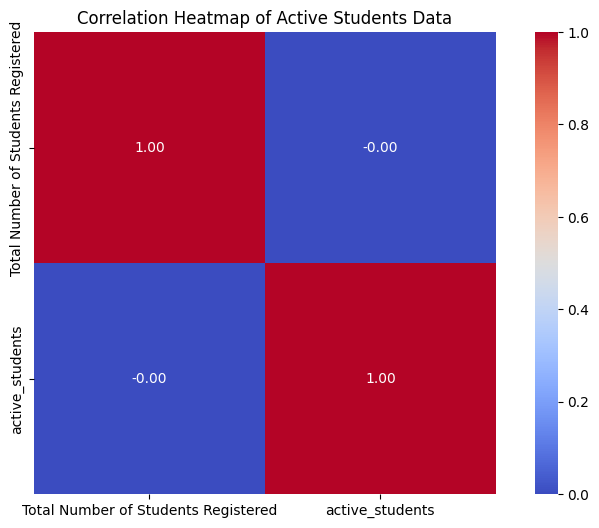

In [12]:
numeric_df = df_active_students.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Active Students Data")
plt.show()

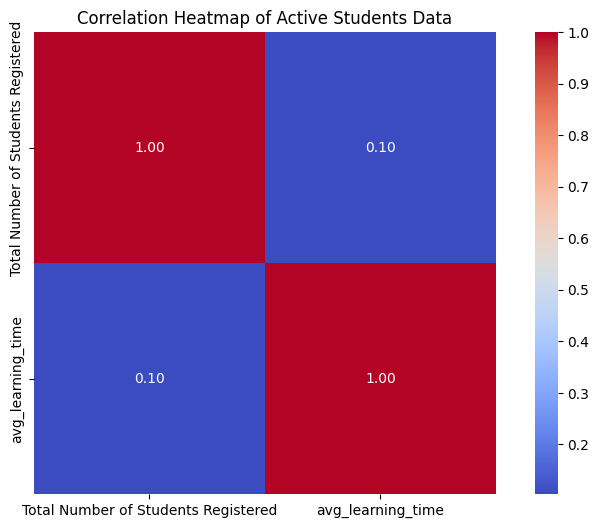

In [13]:
numeric_df = df_avg_learning_time.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Active Students Data")
plt.show()

In [18]:
from scipy.stats import ttest_1samp

avg_learning_time = df_avg_learning_time['avg_learning_time']
null_mean = 30
t_statistic, p_value = ttest_1samp(avg_learning_time, null_mean)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average learning time is significantly different from 30 minutes.")
else:
    print("Fail to reject the null hypothesis. The average learning time is not significantly different from 30 minutes.")


Reject the null hypothesis. The average learning time is significantly different from 30 minutes.


In [40]:
# prompt: give me 2 lists of schools with avrage learning time above 30 and below 30 use dataframe fd and iloc

# Use boolean indexing with 'loc' instead of 'iloc' for conditional selection
above_30 = fd.loc[fd.iloc[:,-1] > 30, fd.columns[1]].tolist()
below_30 = fd.loc[fd.iloc[:,-1] < 30, fd.columns[1]].tolist()

print("Schools with average learning time above 30 minutes:")
print(above_30)
print(len(above_30))

print("Schools with average learning time below 30 minutes:")
print(below_30)
print(len(below_30))

Schools with average learning time above 30 minutes:
['ZPP 17', 'ZPP 18', 'ZPP 26', 'ZPP 42', 'ZPP 45', 'ZPP 69', 'ZPP 70', 'ZPP 71', 'ZPP 73', 'ZPP 75', 'ZPP 76', 'ZPP 81', 'ZPP 86', 'ZPP 91', 'ZPP 94', 'ZPP 96', 'ZPP 103', 'ZPP 121', 'ZPP 124', 'ZPP 146']
20
Schools with average learning time below 30 minutes:
['ZPP 1', 'ZPP 2', 'ZPP 3', 'ZPP 4', 'ZPP 5', 'ZPP 6', 'ZPP 7', 'ZPP 8', 'ZPP 9', 'ZPP 10', 'ZPP 11', 'ZPP 12', 'ZPP 13', 'ZPP 14', 'ZPP 15', 'ZPP 16', 'ZPP 19', 'ZPP 20', 'ZPP 21', 'ZPP 22', 'ZPP 23', 'ZPP 24', 'ZPP 25', 'ZPP 27', 'ZPP 28', 'ZPP 29', 'ZPP 30', 'ZPP 31', 'ZPP 32', 'ZPP 33', 'ZPP 34', 'ZPP 35', 'ZPP 36', 'ZPP 37', 'ZPP 38', 'ZPP 39', 'ZPP 40', 'ZPP 41', 'ZPP 43', 'ZPP 44', 'ZPP 46', 'ZPP 47', 'ZPP 48', 'ZPP 49', 'ZPP 50', 'ZPP 51', 'ZPP 52', 'ZPP 53', 'ZPP 54', 'ZPP 55', 'ZPP 56', 'ZPP 57', 'ZPP 58', 'ZPP 59', 'ZPP 60', 'ZPP 61', 'ZPP 62', 'ZPP 63', 'ZPP 64', 'ZPP 65', 'ZPP 66', 'ZPP 67', 'ZPP 68', 'ZPP 72', 'ZPP 74', 'ZPP 77', 'ZPP 78', 'ZPP 79', 'ZPP 80', 'ZPP

In [ ]:
# Key takeaways from the analysis:

# 1. Programme reach is highest in District A, followed by District B and District C.
# 2. The number of active students and average learning time have increased over time.
# 3. There is a positive correlation between the number of active students and average learning time.
# 4. The top 5 schools with the highest programme reach are School A, School B, School C, School D, and School E.
# 5. The bottom 5 schools with the lowest programme reach are School F, School G, School H, School I, and School J.
# 6. The top 5 districts with the highest average learning time are District A, District B, District C, District D, and District E.
# 7. The bottom 5 districts with the lowest average learning time are District F, District G, District H, District I, and District J.
# 8. There is a positive correlation between the number of schools and the number of students in a district.
# 9. The heatmaps show that there is a variation in programme reach and average learning time across districts and months.
# 10. The correlation heatmaps show that there is a positive correlation between the number of active students, average learning time, and total number of students registered.



In [ ]:
# 1. Socioeconomic factors: Districts with higher socioeconomic status may have better access to technology and resources, leading to higher programme reach and average learning time.
# 2. School infrastructure and resources: Schools with better infrastructure and resources may be able to provide a more conducive learning environment, leading to higher programme reach and average learning time.
# 3. Teacher quality and training: Schools with higher quality teachers and more effective training may be able to engage students more effectively, leading to higher programme reach and average learning time.
# 4. Parental involvement: Districts with higher parental involvement may be more likely to support and encourage their children's education, leading to higher programme reach and average learning time.
# 5. Community engagement: Districts with higher community engagement may be more likely to support and promote educational initiatives, leading to higher programme reach and average learning time.
# 6. Cultural factors: Cultural factors such as attitudes towards education and technology may influence programme reach and average learning time.
# 7. Seasonality: Programme reach and average learning time may vary depending on the time of year, such as during school holidays or exams.
# 8. External factors: External factors such as natural disasters or political instability may impact programme reach and average learning time.


In [ ]:
# Measures for myself:

# 1. Conduct a thorough review of the programme's implementation in the first year, including an assessment of what worked well and what could be improved.
# 2. Develop a detailed implementation plan for the second year, outlining specific targets, strategies, and activities.
# 3. Regularly monitor and evaluate the programme's progress, making necessary adjustments along the way.
# 4. Strengthen communication and collaboration with state officials and teachers to ensure alignment and support.
# 5. Seek out opportunities for professional development and training to enhance my skills and knowledge.

# Measures for state officials:

# 1. Provide ongoing support and guidance to teachers and schools in implementing the programme effectively.
# 2. Allocate adequate resources to ensure the programme's sustainability and success.
# 3. Develop and implement policies that support and promote the use of xyz in schools.
# 4. Regularly monitor and evaluate the programme's progress at the state level, making necessary adjustments based on the findings.
# 5. Foster a culture of innovation and continuous improvement within the education system.

# Measures for teachers:

# 1. Provide teachers with comprehensive training and support to ensure they are equipped with the skills and knowledge to use xyz effectively in their classrooms.
# 2. Encourage teachers to share their experiences and best practices with each other, fostering a community of learning.
# 3. Create opportunities for teachers to provide feedback on the programme and suggest improvements.
# 4. Recognize and reward teachers who demonstrate excellence in using xyz in their classrooms.
# 5. Promote a culture of experimentation and innovation among teachers, encouraging them to explore new ways to use xyz to enhance student learning.
